In [0]:
import pyspark
import pyspark.sql
import pyspark.sql as sparksql
from pyspark.sql.types import *
from pyspark.sql.functions import *
import org.apache.spark
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import Row
from pyspark.context import SparkContext
from pyspark.sql.functions import col
import numpy as np

import collections

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit

from pyspark.sql import SparkSession

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.types import IntegerType

from pyspark.sql.functions import regexp_replace

from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

from pyspark.ml.classification import LinearSVC





In [0]:
import urllib.request
urllib.request.urlretrieve("https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903


In [0]:
# File location and type
file_location = "/FileStore/tables/export.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0,_c1,_c2
path,name,size
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903


In [0]:
# Create a view or table

#temp_table_name = "export_csv"

#df.createOrReplaceTempView(temp_table_name)

/* Query the created temp table in a SQL cell */

 select * from `export_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

#permanent_table_name = "export_csv"

#df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
spark = SparkSession.builder.appName("MIE1628_Assignment3_SparkSession").getOrCreate()

In [0]:
df_RDD = spark.read.csv("dbfs:/kdd/kddcup_data.gz", sep = ",")

In [0]:
df_RDD.show(10)

+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4| _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|181|5450|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   8|   8|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   9|   9|1.00|0.00|0.11|0.00|0.00|0.00|0.00|0.00|normal.|
|  0|tcp|http| SF|239| 486|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   8|   8|0.00|0.00|0.00|0.00|1.00|0.00|0.00|  19|  19|1.00|0.00|0.05

In [0]:
df_RDD.take(1)

Out[80]: [Row(_c0='0', _c1='tcp', _c2='http', _c3='SF', _c4='181', _c5='5450', _c6='0', _c7='0', _c8='0', _c9='0', _c10='0', _c11='1', _c12='0', _c13='0', _c14='0', _c15='0', _c16='0', _c17='0', _c18='0', _c19='0', _c20='0', _c21='0', _c22='8', _c23='8', _c24='0.00', _c25='0.00', _c26='0.00', _c27='0.00', _c28='1.00', _c29='0.00', _c30='0.00', _c31='9', _c32='9', _c33='1.00', _c34='0.00', _c35='0.11', _c36='0.00', _c37='0.00', _c38='0.00', _c39='0.00', _c40='0.00', _c41='normal.')]

- duration: continuous.
- protocol_type: symbolic.
- service: symbolic.
- flag: symbolic.
- src_bytes: continuous.
- dst_bytes: continuous.
- land: symbolic.
- wrong_fragment: continuous.
- urgent: continuous.
- hot: continuous.
- num_failed_logins: continuous.
- logged_in: symbolic.
- num_compromised: continuous.
- root_shell: continuous.
- su_attempted: continuous.
- num_root: continuous.
- num_file_creations: continuous.
- num_shells: continuous.
- num_access_files: continuous.
- num_outbound_cmds: continuous.
- nis_host_login: symbolic.
- is_guest_login: symbolic.
- count: continuous.
- srv_count: continuous.
- serror_rate: continuous.
- srv_serror_rate: continuous.
- rerror_rate: continuous.
- srv_rerror_rate: continuous.
- same_srv_rate: continuous.
- diff_srv_rate: continuous.
- srv_diff_host_rate: continuous.
- dst_host_count: continuous.
- dst_host_srv_count: continuous.
- dst_host_same_srv_rate: continuous.
- dst_host_diff_srv_rate: continuous.
- dst_host_same_src_port_rate: continuous.
- dst_host_srv_diff_host_rate: continuous.
- dst_host_serror_rate: continuous.
- dst_host_srv_serror_rate: continuous.
- dst_host_rerror_rate: continuous.
- dst_host_srv_rerror_rate: continuous.

In [0]:
new_col_names = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'label'
]

In [0]:
len(new_col_names)

Out[82]: 42

In [0]:
df_RDD.count()

Out[83]: 494021

In [0]:
len(df_RDD.columns)

Out[84]: 42

In [0]:
for col in df_RDD.dtypes:
    print(col[0] + " , " + col[1])

_c0 , string
_c1 , string
_c2 , string
_c3 , string
_c4 , string
_c5 , string
_c6 , string
_c7 , string
_c8 , string
_c9 , string
_c10 , string
_c11 , string
_c12 , string
_c13 , string
_c14 , string
_c15 , string
_c16 , string
_c17 , string
_c18 , string
_c19 , string
_c20 , string
_c21 , string
_c22 , string
_c23 , string
_c24 , string
_c25 , string
_c26 , string
_c27 , string
_c28 , string
_c29 , string
_c30 , string
_c31 , string
_c32 , string
_c33 , string
_c34 , string
_c35 , string
_c36 , string
_c37 , string
_c38 , string
_c39 , string
_c40 , string
_c41 , string


In [0]:
df_RDD.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

In [0]:
df_RDD.columns

Out[87]: ['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41']

In [0]:
df_RDD.show()

+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4| _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|181|5450|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   8|   8|0.00|0.00|0.00|0.00|1.00|0.00|0.00|   9|   9|1.00|0.00|0.11|0.00|0.00|0.00|0.00|0.00|normal.|
|  0|tcp|http| SF|239| 486|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   8|   8|0.00|0.00|0.00|0.00|1.00|0.00|0.00|  19|  19|1.00|0.00|0.05

In [0]:
df = df_RDD.toDF(
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'label'
)

In [0]:
df.show()

+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate|dst_hos

In [0]:
#df_columns = SparkSession.createDataFrame(data = df_RDD, schema = new_col_names)

In [0]:
df.show(10)

+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate|dst_hos

In [0]:
df.dtypes

Out[93]: [('duration', 'string'),
 ('protocol_type', 'string'),
 ('service', 'string'),
 ('flag', 'string'),
 ('src_bytes', 'string'),
 ('dst_bytes', 'string'),
 ('land', 'string'),
 ('wrong_fragment', 'string'),
 ('urgent', 'string'),
 ('hot', 'string'),
 ('num_failed_logins', 'string'),
 ('logged_in', 'string'),
 ('num_compromised', 'string'),
 ('root_shell', 'string'),
 ('su_attempted', 'string'),
 ('num_root', 'string'),
 ('num_file_creations', 'string'),
 ('num_shells', 'string'),
 ('num_access_files', 'string'),
 ('num_outbound_cmds', 'string'),
 ('is_host_login', 'string'),
 ('is_guest_login', 'string'),
 ('count', 'string'),
 ('srv_count', 'string'),
 ('serror_rate', 'string'),
 ('srv_serror_rate', 'string'),
 ('rerror_rate', 'string'),
 ('srv_rerror_rate', 'string'),
 ('same_srv_rate', 'string'),
 ('diff_srv_rate', 'string'),
 ('srv_diff_host_rate', 'string'),
 ('dst_host_count', 'string'),
 ('dst_host_srv_count', 'string'),
 ('dst_host_same_srv_rate', 'string'),
 ('dst_host_d

In [0]:
df_pandas = df.toPandas()

In [0]:
df_pandas.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.


In [0]:
df_pandas.dtypes

Out[96]: duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rer

Comments
- 494021 samples
- 42 features

In [0]:
extracted_RDD = df.select("duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "label")

In [0]:
extracted_RDD.show(10)

+--------+-------------+-------+---------+---------+----+-------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag|  label|
+--------+-------------+-------+---------+---------+----+-------+
|       0|          tcp|   http|      181|     5450|  SF|normal.|
|       0|          tcp|   http|      239|      486|  SF|normal.|
|       0|          tcp|   http|      235|     1337|  SF|normal.|
|       0|          tcp|   http|      219|     1337|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      212|     1940|  SF|normal.|
|       0|          tcp|   http|      159|     4087|  SF|normal.|
|       0|          tcp|   http|      210|      151|  SF|normal.|
|       0|          tcp|   http|      212|      786|  SF|normal.|
+--------+-------------+-------+---------+---------+----+-------+
only showing top 10 rows



In [0]:
extracted_RDD.printSchema()

root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)



In [0]:
extracted_RDD = extracted_RDD.withColumn("src_bytes", extracted_RDD['src_bytes'].cast(IntegerType()))
extracted_RDD = extracted_RDD.withColumn("dst_bytes", extracted_RDD['dst_bytes'].cast(IntegerType()))
extracted_RDD = extracted_RDD.withColumn("duration", extracted_RDD['duration'].cast(IntegerType()))

In [0]:
extracted_RDD.printSchema()

root
 |-- duration: integer (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)



## Get the total number of connections based on protocol_type and based on the service. Show result in ascending order. Plot the bar graph for both

In [0]:
extracted_RDD.groupBy("protocol_type").count().show()

+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|190065|
|          udp| 20354|
|         icmp|283602|
+-------------+------+



In [0]:
extracted_RDD_pandas = extracted_RDD.toPandas()

In [0]:
extracted_RDD_pandas.dtypes

Out[104]: duration          int32
protocol_type    object
service          object
src_bytes         int32
dst_bytes         int32
flag             object
label            object
dtype: object

In [0]:
extracted_RDD_pandas['protocol_type'].groupby(extracted_RDD_pandas['protocol_type']).value_counts()

Out[105]: protocol_type  protocol_type
icmp           icmp             283602
tcp            tcp              190065
udp            udp               20354
Name: protocol_type, dtype: int64

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[106]: <AxesSubplot:xlabel='protocol_type', ylabel='count'>

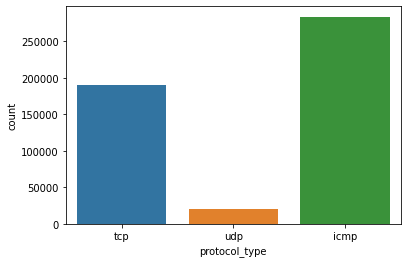

In [0]:
sns.countplot(extracted_RDD_pandas['protocol_type'])

In [0]:
extracted_RDD.groupBy("service").count().show()

+--------+-----+
| service|count|
+--------+-----+
|  telnet|  513|
|     ftp|  798|
|    auth|  328|
|iso_tsap|  115|
|  systat|  115|
|    name|   98|
| sql_net|  110|
|   ntp_u|  380|
|     X11|   11|
|   pop_3|  202|
|    ldap|  101|
| discard|  116|
|  tftp_u|    1|
|  Z39_50|   92|
| daytime|  103|
|domain_u| 5863|
|   login|  104|
|    smtp| 9723|
|     mtp|  107|
|  domain|  116|
+--------+-----+
only showing top 20 rows



In [0]:
extracted_RDD_pandas['service'].groupby(extracted_RDD_pandas['service']).value_counts()

Out[108]: service    service  
IRC        IRC           43
X11        X11           11
Z39_50     Z39_50        92
auth       auth         328
bgp        bgp          106
                       ... 
urp_i      urp_i        538
uucp       uucp         106
uucp_path  uucp_path    106
vmnet      vmnet        106
whois      whois        110
Name: service, Length: 66, dtype: int64

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[109]: <AxesSubplot:xlabel='service', ylabel='count'>

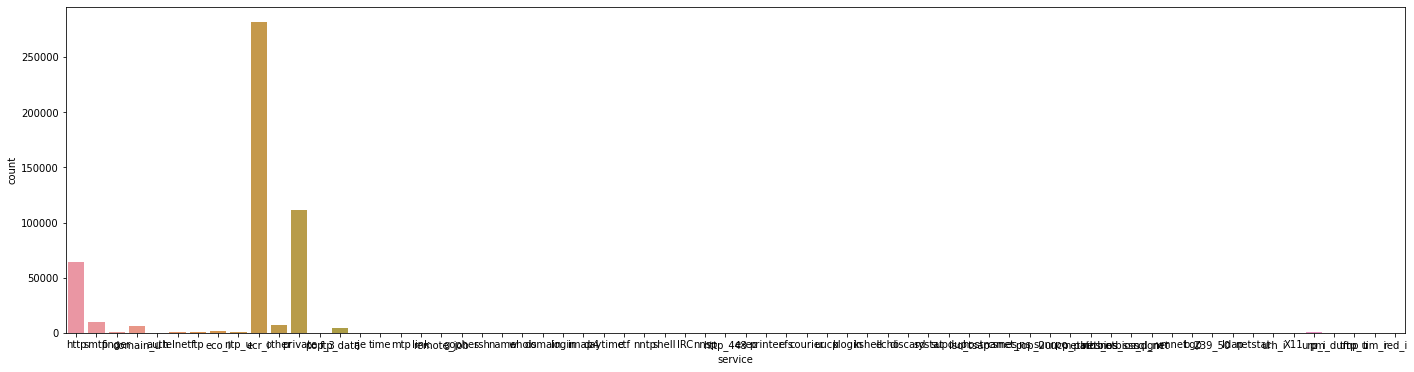

In [0]:
plt.figure(figsize = (24, 6))
sns.countplot(extracted_RDD_pandas['service'])

## Do a further exploratory data analysis, including other columns of this dataset and plot graphs. Plot at least 3 different charts and explain them

In [0]:
#will check label
extracted_RDD.groupBy("label").count().show()

+----------------+------+
|           label| count|
+----------------+------+
|    warezmaster.|    20|
|          smurf.|280790|
|            pod.|   264|
|           imap.|    12|
|           nmap.|   231|
|   guess_passwd.|    53|
|        ipsweep.|  1247|
|      portsweep.|  1040|
|          satan.|  1589|
|           land.|    21|
|     loadmodule.|     9|
|      ftp_write.|     8|
|buffer_overflow.|    30|
|        rootkit.|    10|
|    warezclient.|  1020|
|       teardrop.|   979|
|           perl.|     3|
|            phf.|     4|
|       multihop.|     7|
|        neptune.|107201|
+----------------+------+
only showing top 20 rows



In [0]:
extracted_RDD.select('label').distinct().collect()

Out[111]: [Row(label='warezmaster.'),
 Row(label='smurf.'),
 Row(label='pod.'),
 Row(label='imap.'),
 Row(label='nmap.'),
 Row(label='guess_passwd.'),
 Row(label='ipsweep.'),
 Row(label='portsweep.'),
 Row(label='satan.'),
 Row(label='land.'),
 Row(label='loadmodule.'),
 Row(label='ftp_write.'),
 Row(label='buffer_overflow.'),
 Row(label='rootkit.'),
 Row(label='warezclient.'),
 Row(label='teardrop.'),
 Row(label='perl.'),
 Row(label='phf.'),
 Row(label='multihop.'),
 Row(label='neptune.'),
 Row(label='back.'),
 Row(label='spy.'),
 Row(label='normal.')]

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[112]: <AxesSubplot:xlabel='label', ylabel='count'>

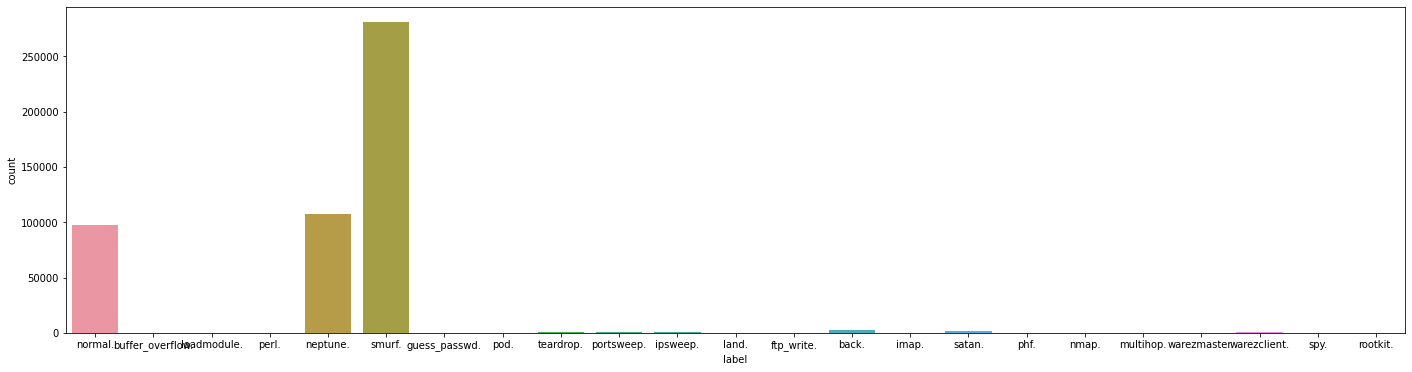

In [0]:
plt.figure(figsize = (24, 6))
sns.countplot(extracted_RDD_pandas['label'])

Out[113]: {'whiskers': [<matplotlib.lines.Line2D at 0x7f249b1d32b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f249b1d39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f249b1d3040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f249b1df130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f249b1df4c0>],
 'means': []}

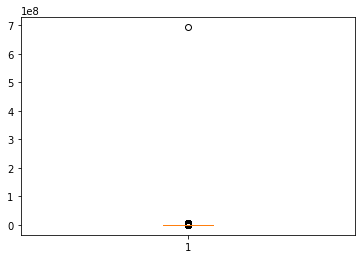

In [0]:
#check SRC bytes
plt.boxplot(extracted_RDD_pandas['src_bytes'])

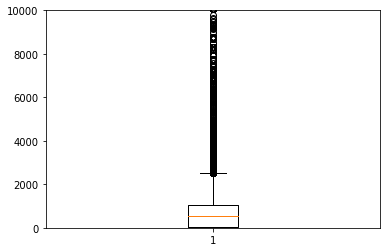

In [0]:
plt.figure()
plt.boxplot(extracted_RDD_pandas['src_bytes'])
plt.ylim(bottom = 0)
plt.ylim(top = 10000)
plt.show()

Out[115]: {'whiskers': [<matplotlib.lines.Line2D at 0x7f249b1157c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f249b115ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f249b115430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f249b124640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f249b1249d0>],
 'means': []}

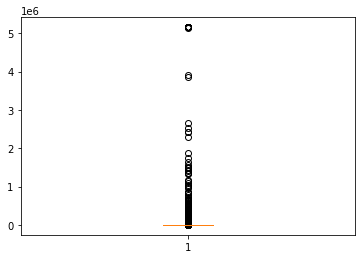

In [0]:
#check dst_bytes
plt.boxplot(extracted_RDD_pandas['dst_bytes'])

In [0]:
#check flag
extracted_RDD.groupBy("flag").count().show()

+------+------+
|  flag| count|
+------+------+
|RSTOS0|    11|
|    S3|    10|
|    SF|378440|
|    S0| 87007|
|   OTH|     8|
|   REJ| 26875|
|  RSTO|   579|
|  RSTR|   903|
|    SH|   107|
|    S2|    24|
|    S1|    57|
+------+------+



/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[117]: <AxesSubplot:xlabel='flag', ylabel='count'>

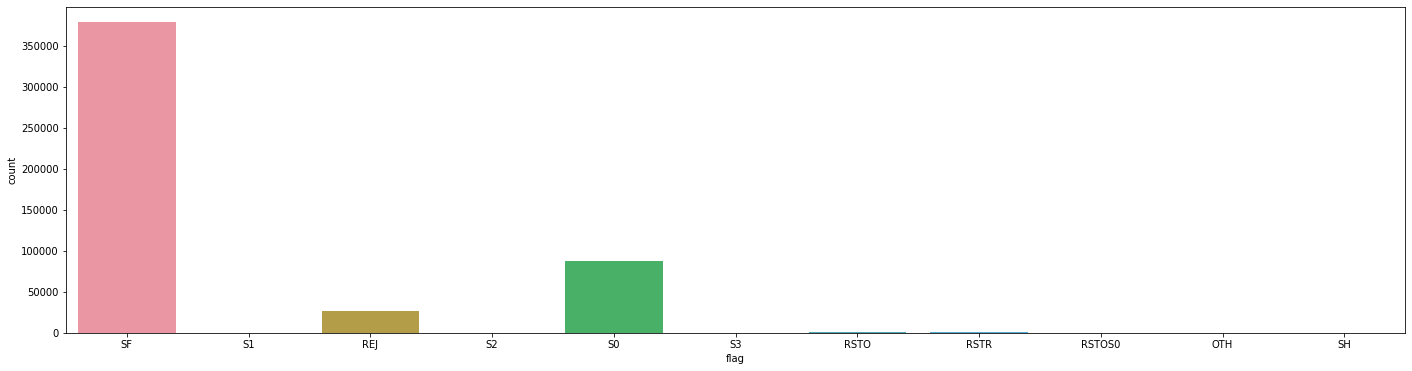

In [0]:
plt.figure(figsize = (24, 6))
sns.countplot(extracted_RDD_pandas['flag'])

## Look at the label column where label == "normal". Now create a new label column where you have a label == 'normal' and everything else is considered an attacker. Split your data (train/test) and based on your new label column now build a simple machine learning model for intrusion detection (You can use few selected column for your model out of all). Explain which algorithm you have selected and why? Show the results with some success metrics

In [0]:
#changing the column to just normal and attacker

In [0]:
relabel_RDD = extracted_RDD.withColumn(
    'label',
    when(
        extracted_RDD.label.contains('normal') == False, 'attack', 
    ).otherwise('normal')
)

In [0]:
relabel_RDD.show()

+--------+-------------+-------+---------+---------+----+------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag| label|
+--------+-------------+-------+---------+---------+----+------+
|       0|          tcp|   http|      181|     5450|  SF|normal|
|       0|          tcp|   http|      239|      486|  SF|normal|
|       0|          tcp|   http|      235|     1337|  SF|normal|
|       0|          tcp|   http|      219|     1337|  SF|normal|
|       0|          tcp|   http|      217|     2032|  SF|normal|
|       0|          tcp|   http|      217|     2032|  SF|normal|
|       0|          tcp|   http|      212|     1940|  SF|normal|
|       0|          tcp|   http|      159|     4087|  SF|normal|
|       0|          tcp|   http|      210|      151|  SF|normal|
|       0|          tcp|   http|      212|      786|  SF|normal|
|       0|          tcp|   http|      210|      624|  SF|normal|
|       0|          tcp|   http|      177|     1985|  SF|normal|
|       0|          tcp| 

In [0]:
relabel_RDD.groupBy("label").count().show()

+------+------+
| label| count|
+------+------+
|normal| 97278|
|attack|396743|
+------+------+



In [0]:
protocol_indexer = StringIndexer(inputCol = 'protocol_type', outputCol = 'protocol_type_index')
service_indexer = StringIndexer(inputCol = 'service', outputCol = 'service_index')
flag_indexer = StringIndexer(inputCol = 'flag', outputCol = 'flag_index')
label_indexer = StringIndexer(inputCol = 'label', outputCol = 'label_index')

In [0]:
indexed_RDD = protocol_indexer.fit(relabel_RDD).transform(relabel_RDD)
indexed_RDD = service_indexer.fit(indexed_RDD).transform(indexed_RDD)
indexed_RDD = flag_indexer.fit(indexed_RDD).transform(indexed_RDD)
indexed_RDD = label_indexer.fit(indexed_RDD).transform(indexed_RDD)

In [0]:
indexed_RDD.show()

+--------+-------------+-------+---------+---------+----+------+-------------------+-------------+----------+-----------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag| label|protocol_type_index|service_index|flag_index|label_index|
+--------+-------------+-------+---------+---------+----+------+-------------------+-------------+----------+-----------+
|       0|          tcp|   http|      181|     5450|  SF|normal|                1.0|          2.0|       0.0|        1.0|
|       0|          tcp|   http|      239|      486|  SF|normal|                1.0|          2.0|       0.0|        1.0|
|       0|          tcp|   http|      235|     1337|  SF|normal|                1.0|          2.0|       0.0|        1.0|
|       0|          tcp|   http|      219|     1337|  SF|normal|                1.0|          2.0|       0.0|        1.0|
|       0|          tcp|   http|      217|     2032|  SF|normal|                1.0|          2.0|       0.0|        1.0|
|       0|          tcp|

In [0]:
indexed_RDD = indexed_RDD.drop("protocol_type", "service", 'flag', 'label')

In [0]:
indexed_RDD.show()

+--------+---------+---------+-------------------+-------------+----------+-----------+
|duration|src_bytes|dst_bytes|protocol_type_index|service_index|flag_index|label_index|
+--------+---------+---------+-------------------+-------------+----------+-----------+
|       0|      181|     5450|                1.0|          2.0|       0.0|        1.0|
|       0|      239|      486|                1.0|          2.0|       0.0|        1.0|
|       0|      235|     1337|                1.0|          2.0|       0.0|        1.0|
|       0|      219|     1337|                1.0|          2.0|       0.0|        1.0|
|       0|      217|     2032|                1.0|          2.0|       0.0|        1.0|
|       0|      217|     2032|                1.0|          2.0|       0.0|        1.0|
|       0|      212|     1940|                1.0|          2.0|       0.0|        1.0|
|       0|      159|     4087|                1.0|          2.0|       0.0|        1.0|
|       0|      210|      151|  

In [0]:
indexed_RDD.groupBy("label_index").count().show()

+-----------+------+
|label_index| count|
+-----------+------+
|        0.0|396743|
|        1.0| 97278|
+-----------+------+



In [0]:
#Converting data into vectors and splitting the data

vector_assembler = VectorAssembler(
    inputCols = ['duration', 'src_bytes', 'dst_bytes', 'protocol_type_index', 'service_index', 'flag_index'],
    outputCol = "features"
)

data_vector = vector_assembler.transform(indexed_RDD)

In [0]:
data_vector.show()

+--------+---------+---------+-------------------+-------------+----------+-----------+--------------------+
|duration|src_bytes|dst_bytes|protocol_type_index|service_index|flag_index|label_index|            features|
+--------+---------+---------+-------------------+-------------+----------+-----------+--------------------+
|       0|      181|     5450|                1.0|          2.0|       0.0|        1.0|[0.0,181.0,5450.0...|
|       0|      239|      486|                1.0|          2.0|       0.0|        1.0|[0.0,239.0,486.0,...|
|       0|      235|     1337|                1.0|          2.0|       0.0|        1.0|[0.0,235.0,1337.0...|
|       0|      219|     1337|                1.0|          2.0|       0.0|        1.0|[0.0,219.0,1337.0...|
|       0|      217|     2032|                1.0|          2.0|       0.0|        1.0|[0.0,217.0,2032.0...|
|       0|      217|     2032|                1.0|          2.0|       0.0|        1.0|[0.0,217.0,2032.0...|
|       0|      212

In [0]:
data_vector = data_vector.drop('duration', 'src_bytes', 'dst_bytes', 'protocol_type_index', 'service_index', 'flag_index')

In [0]:
data_vector.show()

+-----------+--------------------+
|label_index|            features|
+-----------+--------------------+
|        1.0|[0.0,181.0,5450.0...|
|        1.0|[0.0,239.0,486.0,...|
|        1.0|[0.0,235.0,1337.0...|
|        1.0|[0.0,219.0,1337.0...|
|        1.0|[0.0,217.0,2032.0...|
|        1.0|[0.0,217.0,2032.0...|
|        1.0|[0.0,212.0,1940.0...|
|        1.0|[0.0,159.0,4087.0...|
|        1.0|[0.0,210.0,151.0,...|
|        1.0|[0.0,212.0,786.0,...|
|        1.0|[0.0,210.0,624.0,...|
|        1.0|[0.0,177.0,1985.0...|
|        1.0|[0.0,222.0,773.0,...|
|        1.0|[0.0,256.0,1169.0...|
|        1.0|[0.0,241.0,259.0,...|
|        1.0|[0.0,260.0,1837.0...|
|        1.0|[0.0,241.0,261.0,...|
|        1.0|[0.0,257.0,818.0,...|
|        1.0|[0.0,233.0,255.0,...|
|        1.0|[0.0,233.0,504.0,...|
+-----------+--------------------+
only showing top 20 rows



In [0]:
training_data, test_data = data_vector.randomSplit([0.7, 0.3], seed = 42)

Comments
- the ML model used will be LinearSVC
- LinearSVC was chosen becasuse the IntrusionDetection paper discussed the results using support vector machines
- In the spirit of following the paper's methodology, a support vector classifier will be used

In [0]:
svc = LinearSVC(featuresCol = 'features', labelCol = 'label_index')

In [0]:
evalBCE = BCE(labelCol = 'label_index', rawPredictionCol = 'rawPrediction')

In [0]:
svc_trained = svc.fit(training_data)

In [0]:
svc_predict = svc_trained.transform(test_data)

In [0]:
svc_predict.show()

+-----------+---------------+--------------------+----------+
|label_index|       features|       rawPrediction|prediction|
+-----------+---------------+--------------------+----------+
|        0.0|  (6,[1],[8.0])|[1.75465994605045...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|        0.0|(6,[1],[520.0])|[1.75641310141996...|       0.0|
|       

In [0]:
bce_score = evalBCE.evaluate(svc_predict)
print("BCE AUC-ROC score: " + str(bce_score))

BCE AUC-ROC score: 0.9395337740038636


In [0]:
evalBCE = BCE(metricName = "areaUnderPR", labelCol = 'label_index', rawPredictionCol = 'rawPrediction')
bce_score = evalBCE.evaluate(svc_predict)
print("BCE AUC-Precision-Recall score: " + str(bce_score))

BCE AUC-Precision-Recall score: 0.92420518322519


Comments
- It appears that even with just the default parameters, the SVC model performs well
- The model achieve 0.94 AUC-ROC score and 0.92 AUC-Precision-Recall score